## SQL in Python with SQLAlchemy

In [36]:
#! pip install sklearn 

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from scipy import stats
import scipy as scipy
import warnings
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use('dark_background')


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

# Build a 'connection string'
conn_str = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'
engine = create_engine(conn_str)

Create a new score variable from the weighted averages of all score variables in the datasets. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!

1) make a separate dataframe


find the total population
combine scores for an average




What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?


compare column to other columns:

1) make plots

2) check distributions

3) corr, depending on distribution use dist tests

interpret info


Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?
What is the correlation between the overall score variable and the 1st principal component?

1) read the module and follow instructions carefully


If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

### Running a query

In [38]:
query = """
SELECT *
FROM useducation
"""

df = pd.read_sql_query(query, engine)
print(f'Row count is: {df.shape[0]}')
print(f'Column names are: {list(df.columns)}')
df.head()

Row count is: 1492
Column names are: ['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [39]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = df["STATE"].unique()

for state in states:
    df.loc[df["STATE"] == state, fill_list] = df.loc[df["STATE"] == state, fill_list].interpolate()

In [40]:
# Close your database connection when you're done!
engine.dispose()
# Close your database connection when you're done!

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1281 non-null float64
TOTAL_REVENUE                   1331 non-null float64
FEDERAL_REVENUE                 1331 non-null float64
STATE_REVENUE                   1331 non-null float64
LOCAL_REVENUE                   1331 non-null float64
TOTAL_EXPENDITURE               1331 non-null float64
INSTRUCTION_EXPENDITURE         1331 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1331 non-null float64
OTHER_EXPENDITURE               1281 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1331 non-null float64
GRADES_PK_G                     1443 non-null float64
GRADES_KG_G                     1485 non-null float64
GRADES_4_G                      1485 non-null float64
GRADES_8_G                      1

In [42]:
w_avg = [
    
    [df.AVG_MATH_4_SCORE, df.AVG_READING_4_SCORE, df.GRADES_4_G],
        
        [df.AVG_MATH_8_SCORE, df.AVG_READING_8_SCORE, df.GRADES_8_G]

]

In [43]:
def weighted_avg(avg_list):

    col_list = []
    pop_list = []
    
    for i in avg_list:

        x = len(i) - 1
        
        col_list += [i[-1] * (sum(i[:x]) / x)]
        
        pop_list += [i[-1]]

    return sum(col_list) / sum(pop_list)

In [44]:
corr = e_df.corr()

corr

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,weighted_avg
TOTAL_EXPENDITURE,1.000000,0.991256,0.993101,0.945620,0.089278
INSTRUCTION_EXPENDITURE,0.991256,1.000000,0.976215,0.908104,0.102186
SUPPORT_SERVICES_EXPENDITURE,0.993101,0.976215,1.000000,0.953297,0.094281
OTHER_EXPENDITURE,0.945620,0.908104,0.953297,1.000000,0.012376
weighted_avg,0.089278,0.102186,0.094281,0.012376,1.000000


In [45]:
df['weighted_avg'] = weighted_avg(w_avg)

In [46]:
e_df = df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'weighted_avg']]

In [47]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,weighted_avg
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,235.639070
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,235.441283
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,95221.0,90391.0,772414.0,386781.0,1192648.0,248.041059,290.081407,227.598382,273.402640,259.594501
1488,2017_WASHINGTON,WASHINGTON,2017,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,79483.0,89258.0,656797.0,336808.0,1007338.0,241.701001,289.131257,223.123409,267.744778,255.009879
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,20426.0,18432.0,162070.0,80142.0,257289.0,236.057019,273.415854,217.316396,271.617023,249.950079
1490,2017_WISCONSIN,WISCONSIN,2017,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,61084.0,66253.0,489919.0,263896.0,809722.0,240.389213,288.143144,219.612694,258.700304,251.726455


In [55]:
e_df.dropna(inplace=True)

X = e_df.drop(columns=['weighted_avg'])
y = e_df['weighted_avg']

scaled_X = scale(X)

pca = PCA()
pca_X = pca.fit_transform(scaled_X)


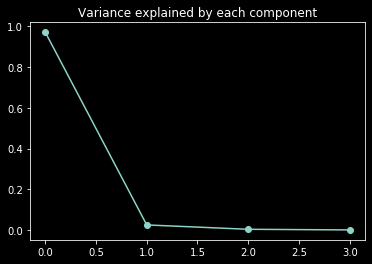

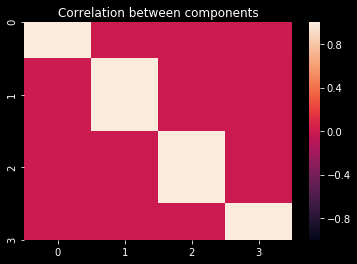

In [50]:
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Variance explained by each component')
plt.show()

sns.heatmap(pd.DataFrame(pca_X).corr(), vmin=-1, vmax=1)
plt.title('Correlation between components')
plt.show()

In [ ]:
pca = PCA(n_components=4)
pca_X = pca.fit_transform(scaled_X)

model = LogisticRegression()
model.fit(pca_X, y)
# In practice score on a test set
model.score(pca_X, y)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

In [62]:
knn = KNeighborsRegressor(n_neighbors =5)
knn.fit(X_train, Y_train)
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)

In [63]:
print(train_score)
print(test_score)

0.4917307740636695
0.17561669365879784
